🔍 Dataset Shape: (200, 10)

📋 Column Names: ['Product Title', 'Price', 'Description', 'Length', 'Breadth', 'Height', 'Unit', 'Metal Type', 'Estimated Cost ($)', 'Cycle Time (min)']

🧠 Data Types:
 Product Title          object
Price                  object
Description            object
Length                float64
Breadth               float64
Height                float64
Unit                   object
Metal Type             object
Estimated Cost ($)    float64
Cycle Time (min)      float64
dtype: object

❓ Missing Values:
 Product Title         0
Price                 0
Description           0
Length                0
Breadth               0
Height                0
Unit                  0
Metal Type            0
Estimated Cost ($)    0
Cycle Time (min)      0
dtype: int64

📛 Duplicated Rows: 0

📊 Summary Statistics:
            Length     Breadth     Height  Estimated Cost ($)  Cycle Time (min)
count  200.000000  200.000000  200.00000          200.000000        200.000000
mean   100.5

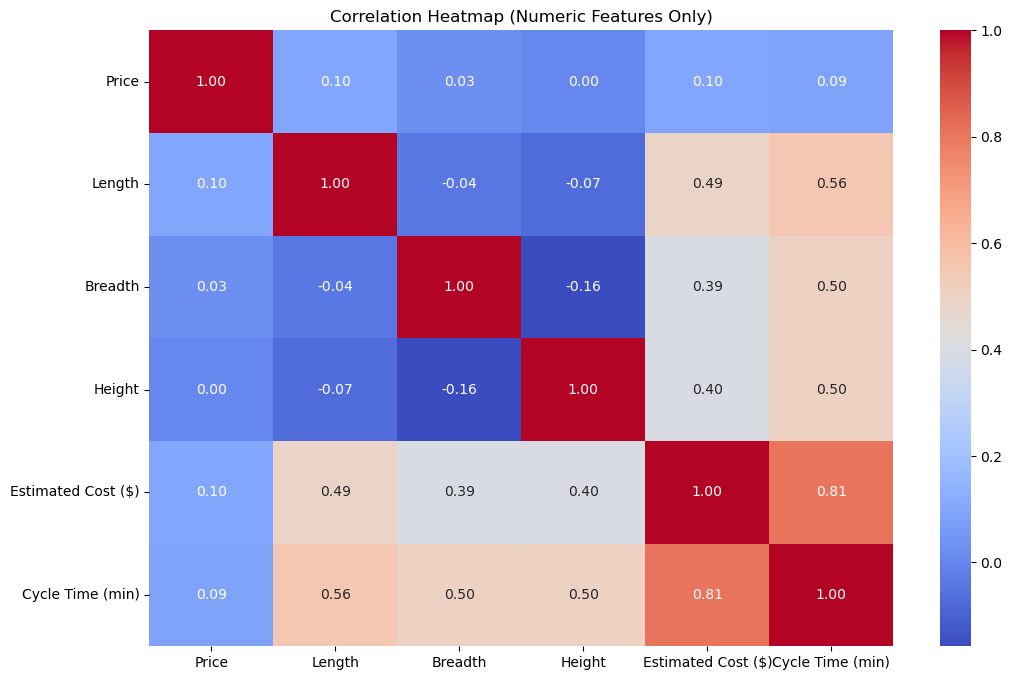

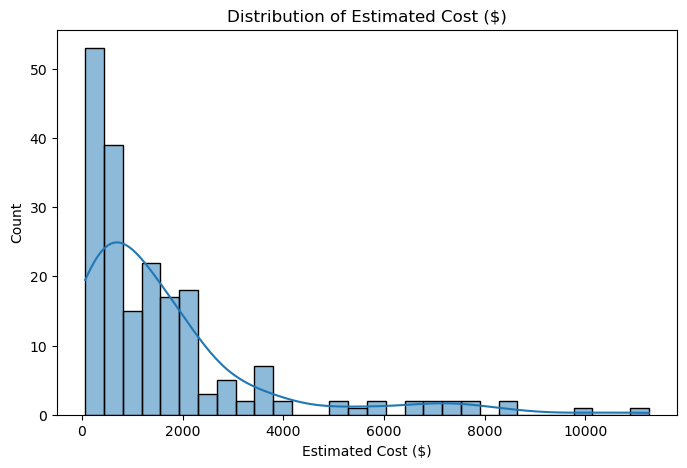

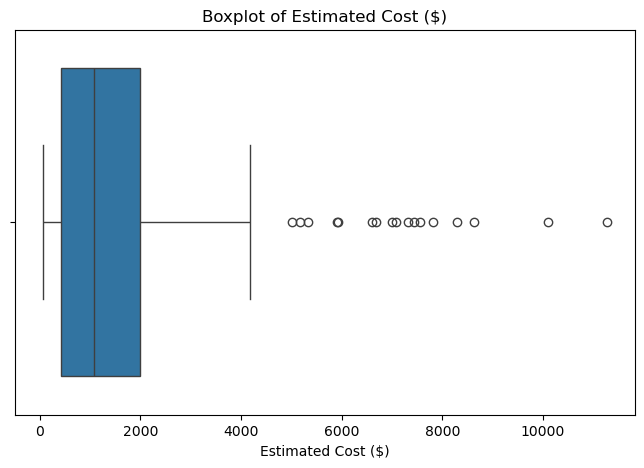

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.read_csv('cnc_machining_dataset_200.csv')  # Replace with your actual file

# --- Basic Information ---
print("🔍 Dataset Shape:", df.shape)
print("\n📋 Column Names:", df.columns.tolist())
print("\n🧠 Data Types:\n", df.dtypes)

# --- Missing Values ---
print("\n❓ Missing Values:\n", df.isnull().sum())

# --- Duplicate Rows ---
print("\n📛 Duplicated Rows:", df.duplicated().sum())

# --- Descriptive Statistics ---
print("\n📊 Summary Statistics:\n", df.describe())

# --- Unique Values in Each Column ---
print("\n🔢 Unique Values:\n", df.nunique())

# --- Check for Invalid or Unexpected Values ---
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        print(f"\n{col} - Min: {df[col].min()}, Max: {df[col].max()}")
    else:
        print(f"\n{col} - Unique Values: {df[col].unique()[:10]}")  # show first 10

# --- Visualizations ---

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("cnc_machining_dataset_200.csv")

# Pie chart for metal types
metal_counts = df['Metal Type'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(metal_counts, labels=metal_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Metal Types")
plt.show()

# Assuming df is already loaded

# --- Step 1: Convert 'Price' from string to float ---
# Remove $ symbol and convert to float
df['Price'] = df['Price'].str.replace('$', '', regex=False).astype(float)

# --- Step 2: Select only numeric columns for correlation ---
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Optional: include cleaned 'Price' in specific numeric set
# numeric_df = df[['Price', 'Length', 'Breadth', 'Height', 'Estimated Cost ($)', 'Cycle Time (min)']]

# --- Step 3: Plot correlation heatmap ---
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


# Distribution of Target Column
target_col = 'Estimated Cost ($)'  # replace with your target column name
plt.figure(figsize=(8, 5))
sns.histplot(df[target_col], kde=True, bins=30)
plt.title(f"Distribution of {target_col}")
plt.show()

# Boxplot for Outlier Detection
plt.figure(figsize=(8, 5))
sns.boxplot(x=df[target_col])
plt.title(f"Boxplot of {target_col}")
plt.show()


✅ XGBoost Mean Squared Error: 0.0346
✅ XGBoost R² Score: 0.9079


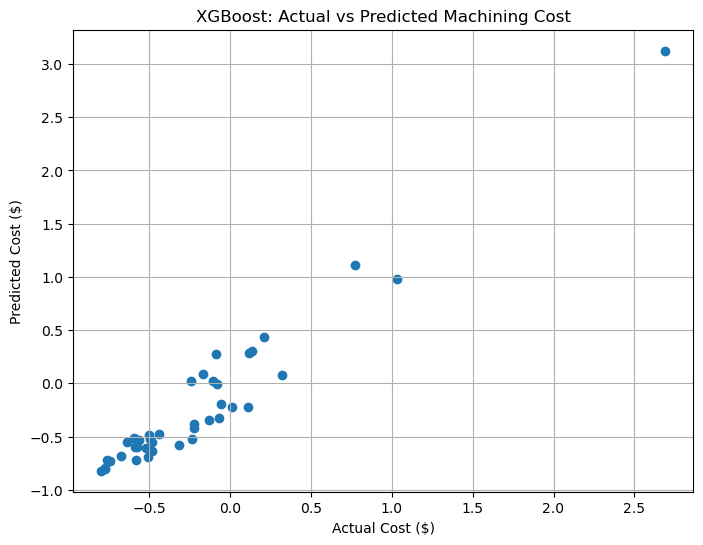

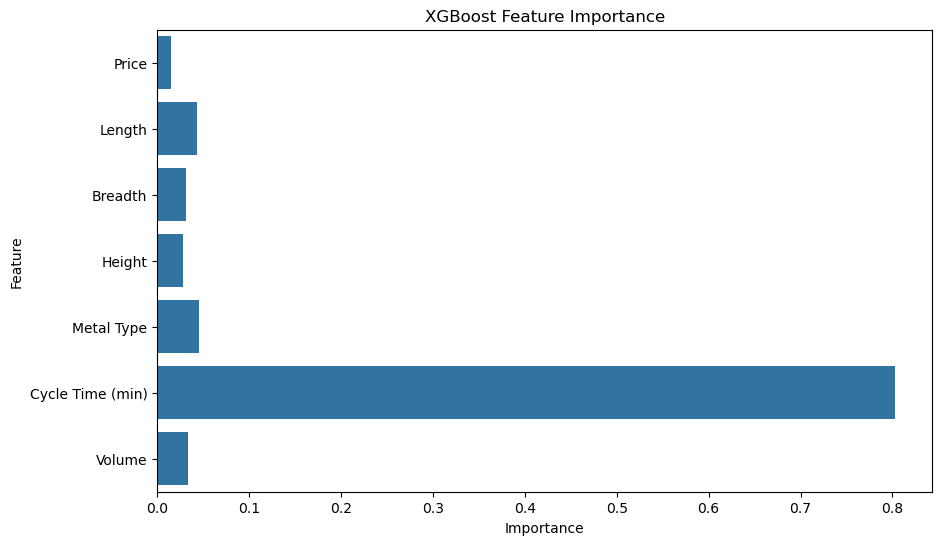

In [14]:
# Step 1: Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset
df = pd.read_csv('cleaned_cnc_data.csv')

# Fix the regex warning by using raw string:
df['Price'] = df['Price'].replace(r'[\$,]', '', regex=True).astype(float)

# Check if 'Unit' exists before using it
#if 'Unit' in df.columns:
 #   for dim in ['Length', 'Breadth', 'Height']:
  #      df.loc[df['Unit'] == 'cm', dim] = df.loc[df['Unit'] == 'cm', dim] * 10
   # df.drop(columns=['Unit'], inplace=True)
#else:
 #   print("Column 'Unit' not found in dataframe!")

# Encode Metal Type
le = LabelEncoder()
df['Metal Type'] = le.fit_transform(df['Metal Type'])

# Step 4: Feature Engineering
df['Volume'] = df['Length'] * df['Breadth'] * df['Height']

# Optional: Drop text columns (can keep if doing NLP later)
#df.drop(columns=['Product Title', 'Description'], inplace=True)

# Step 5: Feature/Target Split
X = df.drop(columns=['Estimated Cost ($)'])  # Features
y = df['Estimated Cost ($)']                 # Target

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ XGBoost Mean Squared Error:", round(mse, 4))
print("✅ XGBoost R² Score:", round(r2, 4))

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Cost ($)')
plt.ylabel('Predicted Cost ($)')
plt.title('XGBoost: Actual vs Predicted Machining Cost')
plt.grid(True)
plt.show()

import seaborn as sns
import pandas as pd
import numpy as np

importance = xgb_model.feature_importances_
features = X_train.columns

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=features)
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Mean Absolute Error (MAE): 297.06387294006345
Mean Squared Error (MSE): 202501.40745327334
Root Mean Squared Error (RMSE): 450.0015638342531
R-squared (R2): 0.8633923512139077


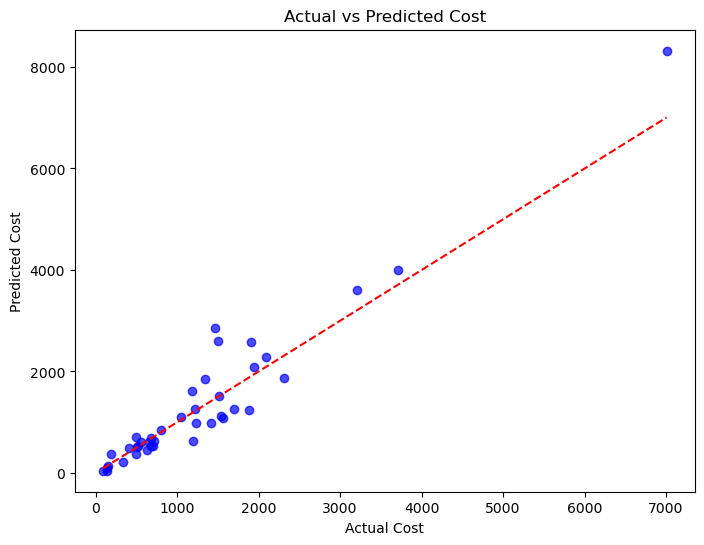

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

# 1. Load your dataset
df = pd.read_csv("cnc_machining_dataset_200.csv")


# 2. Separate features and target
X = df.drop("Estimated Cost ($)", axis=1)
y = df["Estimated Cost ($)"]

# 3. Encode categorical features (Label Encoding for object types)
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Define and train XGBoost model
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 6. Predict on test set
y_pred = model.predict(X_test)

# 7. Evaluate the model
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-squared (R2):", r2_score(y_test, y_pred))

# 📉 Predicted vs Actual Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Cost')
plt.ylabel('Predicted Cost')
plt.title('Actual vs Predicted Cost')
plt.savefig("actual_vs_predicted.png")
plt.show()



In [16]:
model.save_model("xgb_model.json")


In [17]:
import pandas as pd

# Example sample input dictionary (replace values with your test case)
sample_input = {
    "Product Title": "Within I ask all herself",
    "Price": "$383.66",
    "Description": "Finish science visit pull trial floor keep north agent far fly.",
    "Length": 85.38,
    "Breadth": 190.55,
    "Height": 33.77,
    "Unit": "mm",
    "Metal Type": "Steel",
    "Cycle Time (min)": 34.61
}

# Process and encode input
processed_input = {
    k: (label_encoders[k].transform([v])[0] if k in label_encoders 
        else float(v.replace('$','')) if k == "Price" and isinstance(v, str) and '$' in v
        else v)
    for k, v in sample_input.items()
}

# Create DataFrame for prediction
input_df = pd.DataFrame([processed_input])

# Predict estimated cost
predicted_cost = model.predict(input_df)[0]

print(f"Predicted Estimated Cost ($): {predicted_cost:.2f}")  # " Expected Cost" : "1148.82"


Predicted Estimated Cost ($): 1377.90


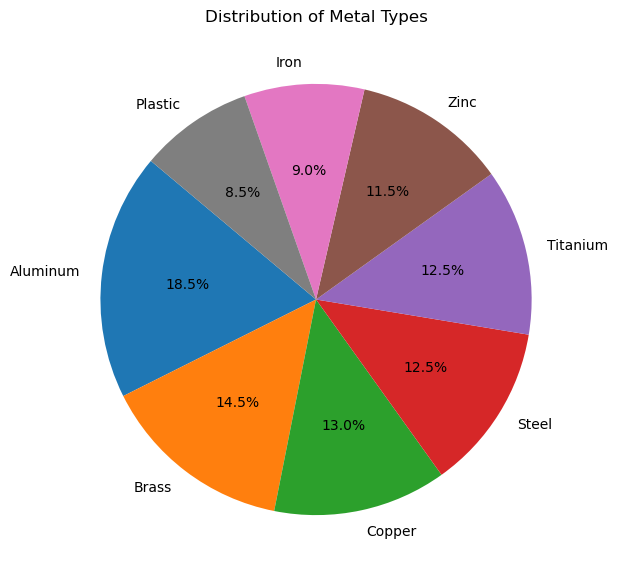

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("cnc_machining_dataset_200.csv")

# Pie chart for metal types
metal_counts = df['Metal Type'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(metal_counts, labels=metal_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Metal Types")
plt.show()


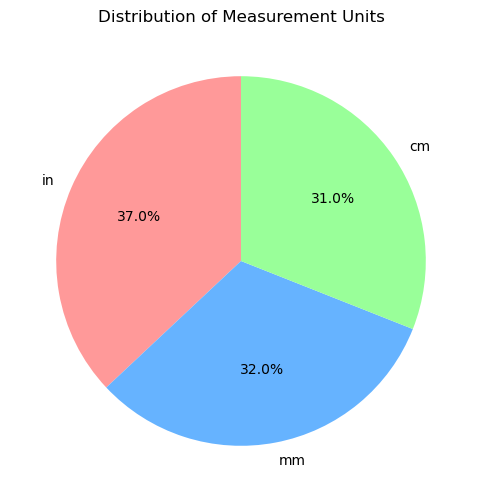

In [2]:
unit_counts = df['Unit'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(unit_counts, labels=unit_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title("Distribution of Measurement Units")
plt.show()


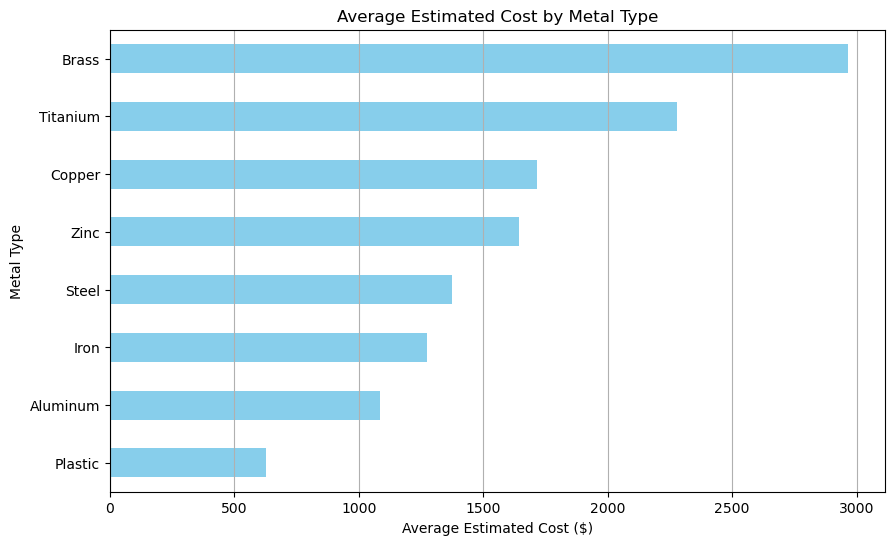

In [3]:
avg_cost_by_metal = df.groupby('Metal Type')['Estimated Cost ($)'].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_cost_by_metal.plot(kind='barh', color='skyblue')
plt.xlabel("Average Estimated Cost ($)")
plt.ylabel("Metal Type")
plt.title("Average Estimated Cost by Metal Type")
plt.grid(axis='x')
plt.show()


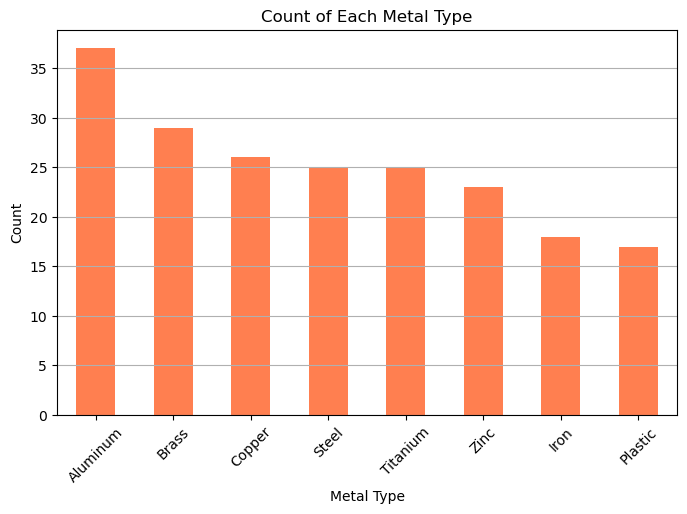

In [4]:
plt.figure(figsize=(8, 5))
df['Metal Type'].value_counts().plot(kind='bar', color='coral')
plt.title("Count of Each Metal Type")
plt.xlabel("Metal Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


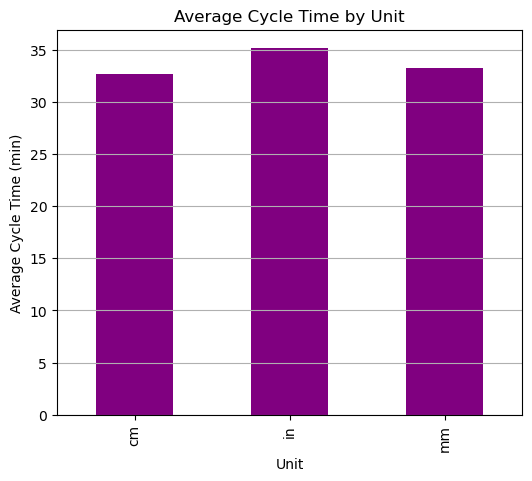

In [5]:
avg_cycle_time_by_unit = df.groupby('Unit')['Cycle Time (min)'].mean()

plt.figure(figsize=(6, 5))
avg_cycle_time_by_unit.plot(kind='bar', color='purple')
plt.title("Average Cycle Time by Unit")
plt.xlabel("Unit")
plt.ylabel("Average Cycle Time (min)")
plt.grid(axis='y')
plt.show()


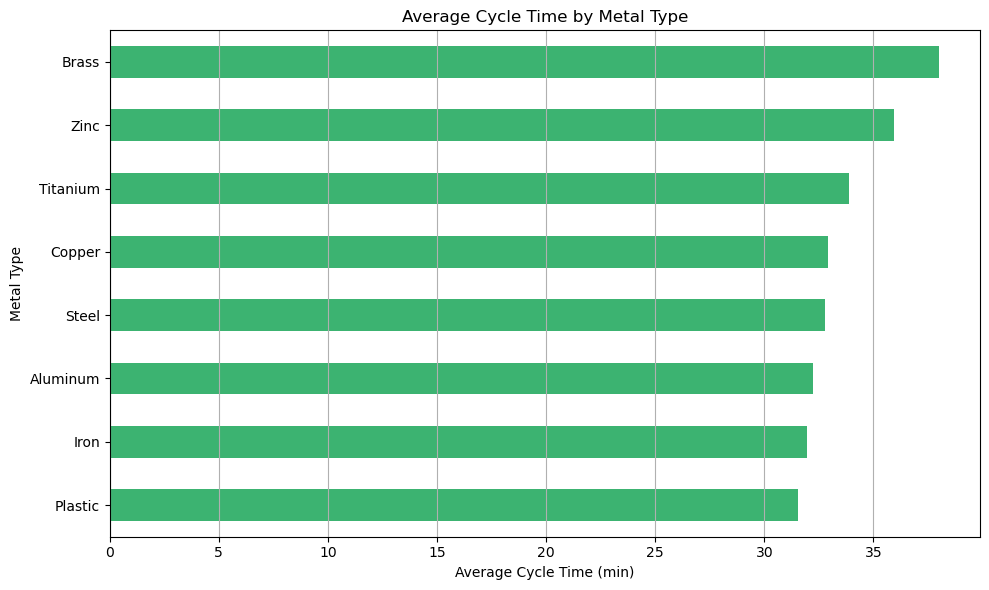

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("cnc_machining_dataset_200.csv")

# Group by 'Metal Type' and calculate average cycle time
avg_cycle_time_by_metal = df.groupby('Metal Type')['Cycle Time (min)'].mean().sort_values()

# Plot
plt.figure(figsize=(10, 6))
avg_cycle_time_by_metal.plot(kind='barh', color='mediumseagreen')
plt.title("Average Cycle Time by Metal Type")
plt.xlabel("Average Cycle Time (min)")
plt.ylabel("Metal Type")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


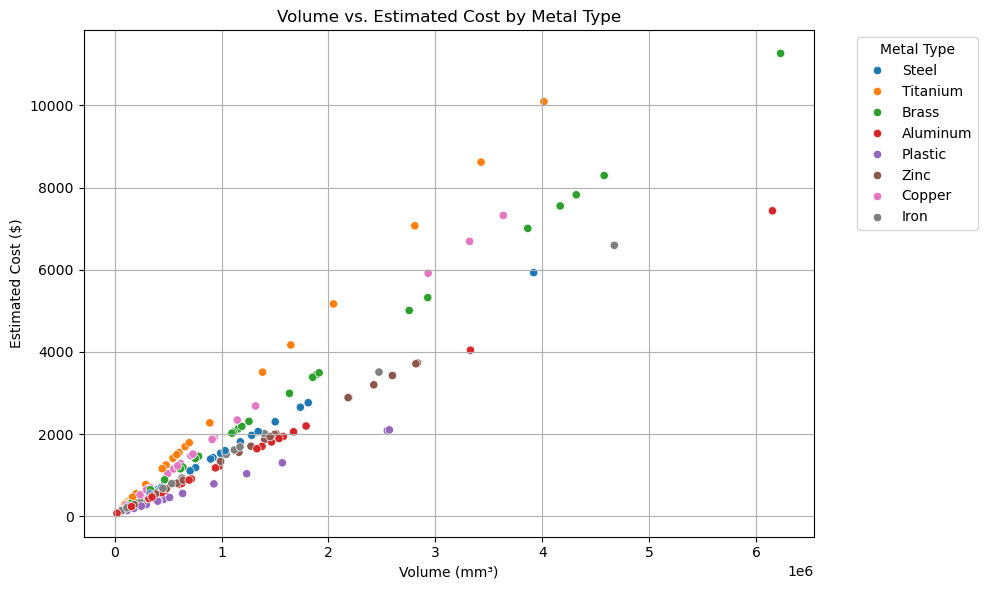

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("cnc_machining_dataset_200.csv")

# Feature Engineering: Calculate Volume
df['Volume'] = df['Length'] * df['Breadth'] * df['Height']

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Volume', y='Estimated Cost ($)', hue='Metal Type', data=df, palette='tab10')
plt.title('Volume vs. Estimated Cost by Metal Type')
plt.xlabel('Volume (mm³)')
plt.ylabel('Estimated Cost ($)')
plt.grid(True)
plt.legend(title='Metal Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\91918\AppData\Local\Temp\ipykernel_18812\3438905476.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Metal Type', y='Estimated Cost ($)', data=df, palette='Set2')


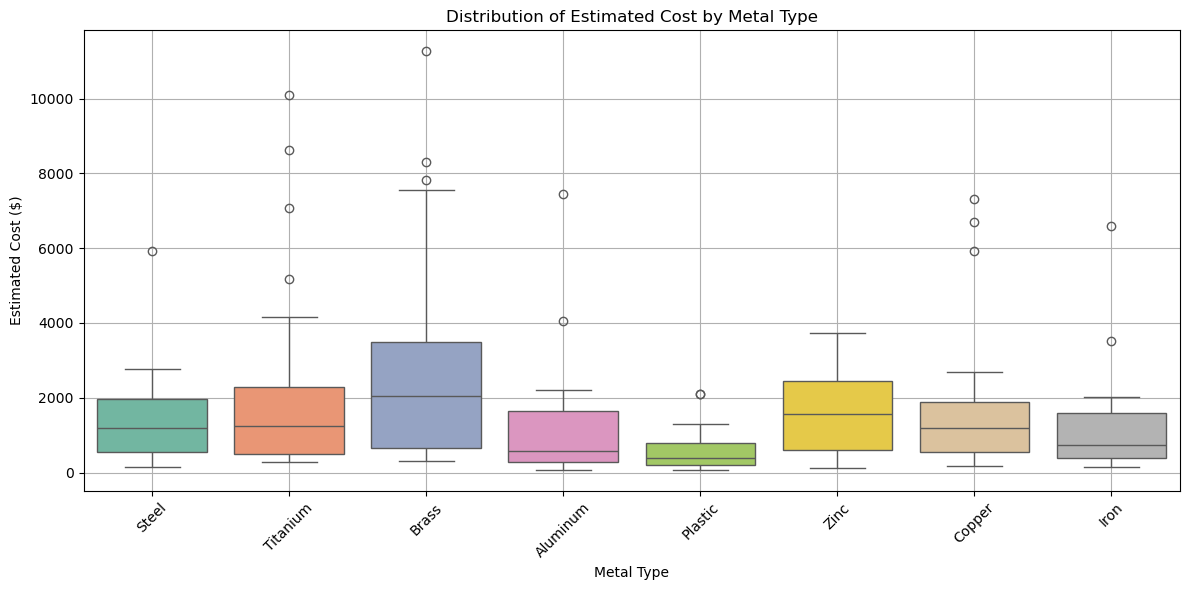

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("cnc_machining_dataset_200.csv")

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Metal Type', y='Estimated Cost ($)', data=df, palette='Set2')
plt.title('Distribution of Estimated Cost by Metal Type')
plt.xlabel('Metal Type')
plt.ylabel('Estimated Cost ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


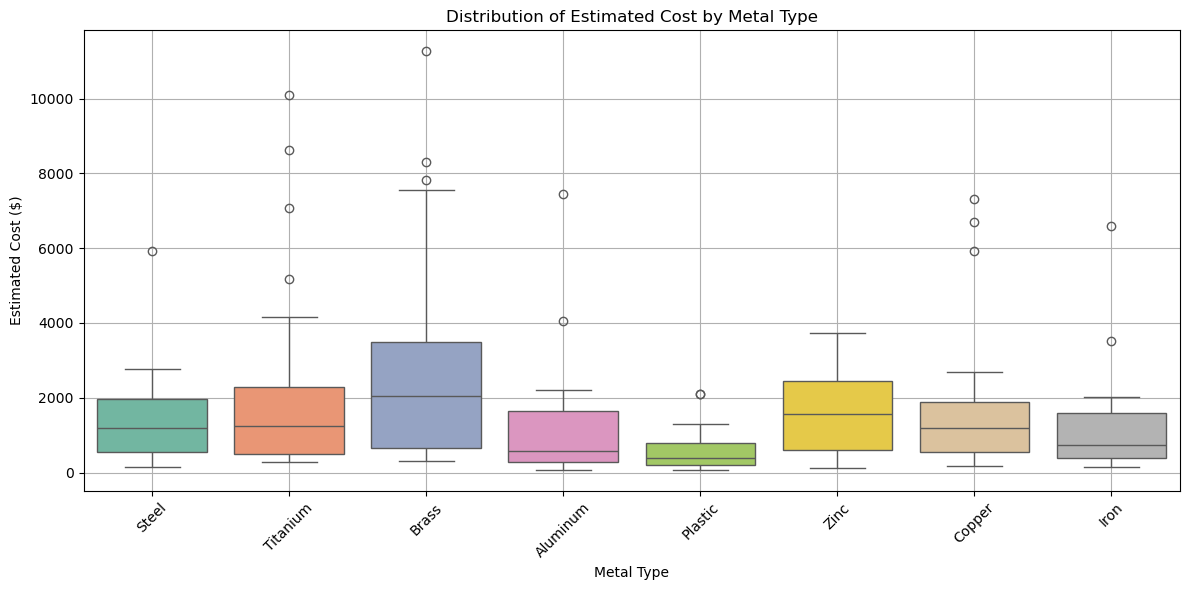

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("cnc_machining_dataset_200.csv")

# Box Plot with fixed palette usage
plt.figure(figsize=(12, 6))
sns.boxplot(x='Metal Type', y='Estimated Cost ($)', hue='Metal Type', data=df, palette='Set2', dodge=False, legend=False)
plt.title('Distribution of Estimated Cost by Metal Type')
plt.xlabel('Metal Type')
plt.ylabel('Estimated Cost ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
